In [15]:
import pandas as pd
import plotly.express as px
from itables import show



In [11]:
f = "../data/annual-co2-emissions-per-country.csv"
co2 = pd.read_csv(f)
entities = co2.Entity.unique()
co2

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [10]:
incomes = [entity for entity in entities if "income" in entity]
co2_income = co2[co2.Entity.isin(incomes)]
incomes

['High-income countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'Upper-middle-income countries']

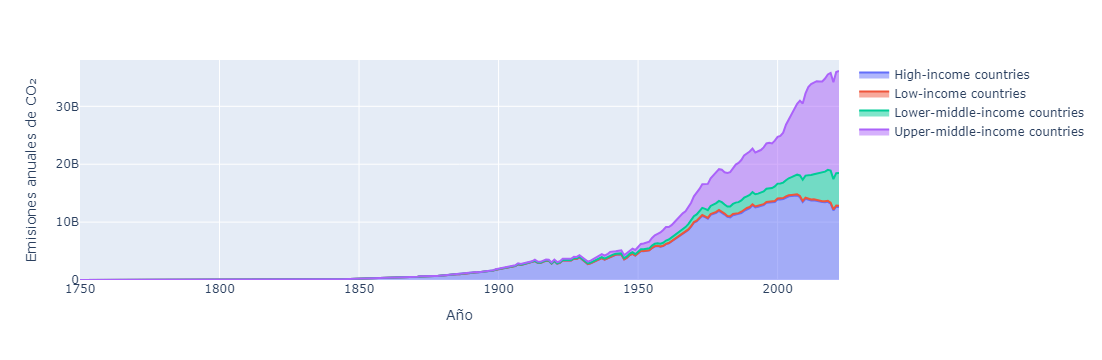

In [9]:

# Crear la gráfica de área apilada
fig = px.area(
    co2_income, 
    x='Year', 
    y='Annual CO₂ emissions', 
    color='Entity', 
    labels={
        'Year': 'Año', 
        'Annual CO₂ emissions': 'Emisiones anuales de CO₂',
        'Entity': ''
    },
    # title='Emisiones anuales de CO₂ por grupo de ingresos (1750-2021)'
)

# Ajustar la gráfica si es necesario
# fig.update_layout(
#     xaxis_title='Año',
    # yaxis_title='Emisiones anuales de CO₂ (toneladas)',
    # legend_title_text='Grupo de Ingresos',
    # width=900,
    # height=600
# )

# Mostrar la gráfica
fig.show()


In [17]:
import pandas as pd
from itables import show

# Definir los grupos de países según los ingresos
income_groups = {
    'High-income countries': ['Andorra', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States'],
    'Upper-middle-income countries': ['Argentina', 'Brazil', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Iran', 'Mexico', 'Panama', 'Peru', 'Russia', 'South Africa', 'Turkey'],
    'Lower-middle-income countries': ['Afghanistan', 'Bangladesh', 'India', 'Kenya', 'Myanmar', 'Nigeria', 'Pakistan', 'Philippines', 'Sri Lanka', 'Tanzania', 'Vietnam', 'Zambia'],
    'Low-income countries': ['Burundi', 'Chad', 'Congo', 'Eritrea', 'Ethiopia', 'Haiti', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Uganda', 'Zimbabwe']
}

# Crear una lista vacía para almacenar los datos
data = []

# Mapear cada país en el DataFrame co2 a su grupo de ingresos
for entity in co2['Entity'].unique():
    for group, countries in income_groups.items():
        if entity in countries:
            # Filtrar el DataFrame por país y sumar las emisiones de CO₂
            total_co2 = co2[co2['Entity'] == entity]['Annual CO₂ emissions'].sum()
            data.append([entity, group, total_co2])

# Crear un DataFrame a partir de los datos
df_groups = pd.DataFrame(data, columns=['Entity', 'Income Group', 'Total CO₂ Emissions'])

# Mostrar la tabla interactiva con itable
show(df_groups)